
# Nearest Neighbors Classification

This example shows how to use :class:`~sklearn.neighbors.KNeighborsClassifier`.
We train such a classifier on the iris dataset and observe the difference of the
decision boundary obtained with regards to the parameter `weights`.


## Load the data

In this example, we use the iris dataset. We split the data into a train and test
dataset.



In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## K-nearest neighbors classifier

We want to use a k-nearest neighbors classifier considering a neighborhood of 11 data
points. Since our k-nearest neighbors model uses euclidean distance to find the
nearest neighbors, it is therefore important to scale the data beforehand. Refer to
the example entitled
`sphx_glr_auto_examples_preprocessing_plot_scaling_importance.py` for more
detailed information.

Thus, we use a :class:`~sklearn.pipeline.Pipeline` to chain a scaler before to use
our classifier.



In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

## Decision boundary

Now, we fit two classifiers with different values of the parameter
`weights`. We plot the decision boundary of each classifier as well as the original
dataset to observe the difference.



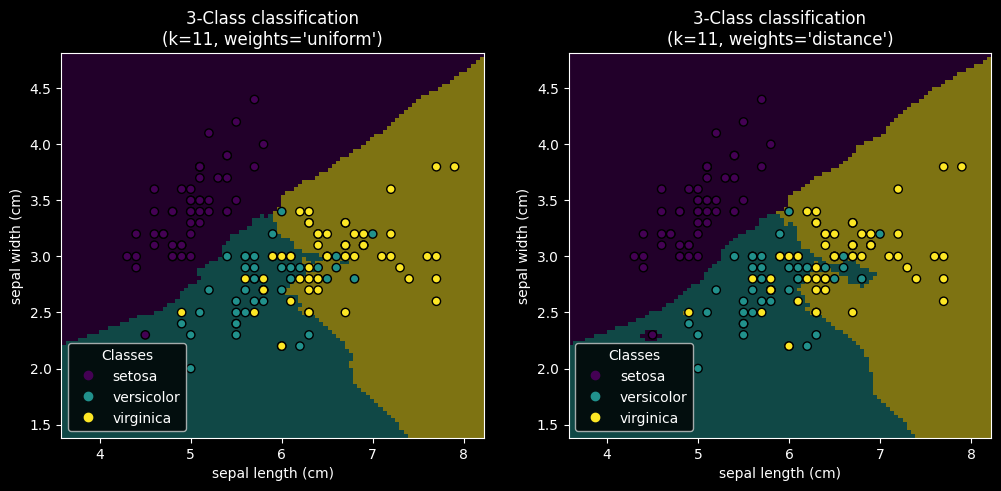

In [3]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

## Conclusion

We observe that the parameter `weights` has an impact on the decision boundary. When
`weights="unifom"` all nearest neighbors will have the same impact on the decision.
Whereas when `weights="distance"` the weight given to each neighbor is proportional
to the inverse of the distance from that neighbor to the query point.

In some cases, taking the distance into account might improve the model.

